In [ ]:
from matplotlib import pyplot as plt
import numpy as np

# Задание 1

In [ ]:
import pandas as pd
df = pd.read_csv('/content/lab2.csv')

df.head(10)

,id,name,area.name,salary.from,salary.to,salary.currency,salary.gross,employer.name,snippet.requirement,snippet.responsibility,schedule.name
0,77448260,Lead Data Engineer,Москва,NaN,500000.0,RUR,False,Wanted,С прошлого года активно развиваем новую област...,...обучения и участвовать в их продукционализа...,Гибкий график
1,77015802,Data Engineer,Москва,200000.0,280000.0,RUR,True,HR Prime,Хороший уровень работы с БД. Опыт с Python. Оп...,Поддержание работоспособности платформы. Разра...,Полный день
2,75921771,Data engineer,Москва,200000.0,250000.0,RUR,False,РВИ,"Высшее техническое образование, предпочтительн...","Системный анализ, инженерная аналитика. Разраб...",Полный день
3,77334669,Аналитик данных / Data Analyst,Москва,160000.0,200000.0,RUR,False,Юрент,Высшее техническое или экономическое образован...,Разработка и валидация новых метрик. Взаимодей...,Удаленная работа
4,77478355,Стажер Data Engineer,Москва,NaN,NaN,NaN,NaN,СБЕР,Желательно: Знание основных понятий и концепци...,"Мы команда, которая занимается созданием витри...",Полный день
5,74376536,Data scientist,Москва,200000.0,240000.0,RUR,False,Астор,Опыт работы на позиции <highlighttext>data</hi...,Полный цикл (<highlighttext>data</highlighttex...,Удаленная работа
6,77113559,Data Engineer,Москва,150000.0,NaN,RUR,False,Автомакон,Уверенные знания SQL и опыт работы с базами да...,"Извлечение, преобразование, загрузка данных и ...",Удаленная работа
7,76921562,Data-engeneer/Дата-инженер (Middle),Москва,250000.0,300000.0,RUR,True,Платформа Больших Данных,Понимание и интерес к области больших данных. ...,Мероприятия для поддержания хорошего настроени...,Удаленная работа
8,77329747,Data engineer (middle+),Москва,NaN,350000.0,RUR,False,Мамаева Ирина Анатольевна,"Уверенные знания Python 3+ (структуры данных, ...",Разработка и развитие платформы прогнозировани...,Удаленная работа
9,77279957,Data Engineer,Москва,NaN,280000.0,RUR,True,Ростелеком,Опыт работы на позиции <highlighttext>инженера...,"Разработка архитектуры доставки, хранения и об...",Полный день


In [ ]:
df.describe()

,id,salary.from,salary.to
count,9.030000e+02,97.000000,80.000000
mean,7.558926e+07,120569.072165,188720.087500
std,2.905674e+06,108907.045954,158526.516009
min,4.549856e+07,1000.000000,7.000000
25%,7.566403e+07,5400.000000,9000.000000
50%,7.665377e+07,100000.000000,160000.000000
75%,7.703528e+07,200000.000000,300000.000000
max,7.749354e+07,400000.000000,600000.000000


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903 entries, 0 to 902
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      903 non-null    int64  
 1   name                    903 non-null    object 
 2   area.name               903 non-null    object 
 3   salary.from             97 non-null     float64
 4   salary.to               80 non-null     float64
 5   salary.currency         128 non-null    object 
 6   salary.gross            128 non-null    object 
 7   employer.name           903 non-null    object 
 8   snippet.requirement     901 non-null    object 
 9   snippet.responsibility  898 non-null    object 
 10  schedule.name           903 non-null    object 
dtypes: float64(2), int64(1), object(8)
memory usage: 77.7+ KB


# **Задание 2**

In [ ]:
df.isna().sum().sort_values(ascending=False)

salary.to                 823
salary.from               806
salary.currency           775
salary.gross              775
snippet.responsibility      5
snippet.requirement         2
id                          0
name                        0
area.name                   0
employer.name               0
schedule.name               0
dtype: int64

In [ ]:
unique = df.nunique()
unique

id                        902
name                      663
area.name                   3
salary.from                35
salary.to                  34
salary.currency             3
salary.gross                2
employer.name             363
snippet.requirement       764
snippet.responsibility    741
schedule.name               5
dtype: int64

In [ ]:
counts_unique = [unique['salary.to'], unique['salary.from'], unique['salary.currency'], unique['salary.gross'], unique['snippet.responsibility'], unique['snippet.requirement'], unique['id'], unique['name'], unique['area.name'], unique['employer.name'], unique['schedule.name']]
counts_unique

[34, 35, 3, 2, 741, 764, 902, 663, 3, 363, 5]

In [ ]:
groups = df.isna().sum().sort_values(ascending=False).keys()
counts = df.isna().sum().sort_values(ascending=False)

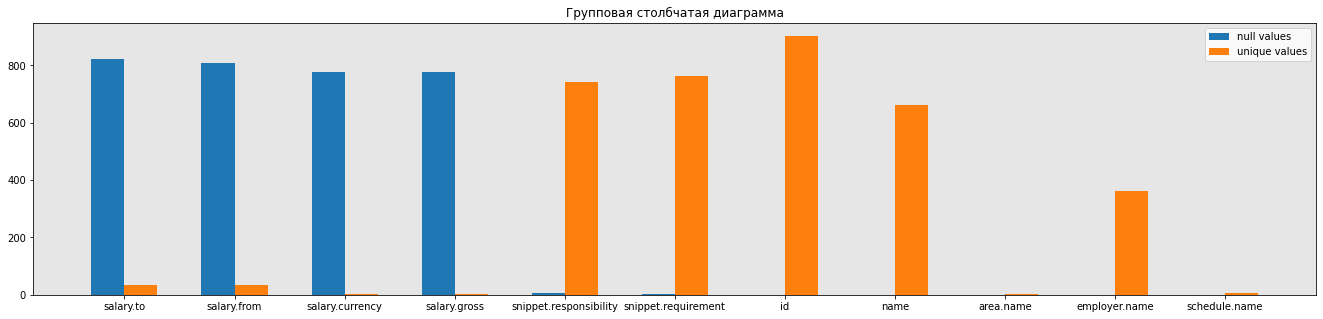

In [ ]:
fig , ax = plt.subplots(figsize=(23, 5))

width = 0.3

x = np.arange(len(groups))

rects1 = ax.bar(x - width/2, counts, width, label='null values')
rects2 = ax.bar(x + width/2, counts_unique, width, label='unique values')

ax.set_title('Групповая столбчатая диаграмма')
ax.set_xticks(x)
ax.set_xticklabels(groups)
ax.set_facecolor('#E6E6E6')
ax.legend()

# **Задание 3**

In [ ]:
# Добавим к dataframe столбцы с числом символов в столбцах snippet.requirements и snippet.responsibility

df['requirements_len'] = df['snippet.requirement'].str.len()
df['responsibility_len'] = df['snippet.responsibility'].str.len()
df.head(3)

,id,name,area.name,salary.from,salary.to,salary.currency,salary.gross,employer.name,snippet.requirement,snippet.responsibility,schedule.name,requirements_len,responsibility_len
0,77448260,Lead Data Engineer,Москва,NaN,500000.0,RUR,False,Wanted,С прошлого года активно развиваем новую област...,...обучения и участвовать в их продукционализа...,Гибкий график,155.0,242.0
1,77015802,Data Engineer,Москва,200000.0,280000.0,RUR,True,HR Prime,Хороший уровень работы с БД. Опыт с Python. Оп...,Поддержание работоспособности платформы. Разра...,Полный день,69.0,101.0
2,75921771,Data engineer,Москва,200000.0,250000.0,RUR,False,РВИ,"Высшее техническое образование, предпочтительн...","Системный анализ, инженерная аналитика. Разраб...",Полный день,169.0,161.0


In [ ]:
# С помошью перцентилей найдем выбросы

Q1 =  [df['salary.from'].quantile(0.25), df['salary.to'].quantile(0.25), df['requirements_len'].quantile(0.25), df['responsibility_len'].quantile(0.25)]
Q3 = [df['salary.from'].quantile(0.75), df['salary.to'].quantile(0.75), df['requirements_len'].quantile(0.75), df['responsibility_len'].quantile(0.75)]
IQR = [Q3[0] - Q1[0], Q3[1] - Q1[1], Q3[2] - Q1[2], Q3[3] - Q1[3]]

In [ ]:
anomalies_low = [df['salary.from'][(df['salary.from'] < Q1[0])].value_counts().sum(), 
                 df['salary.to'][(df['salary.to'] < Q1[1])].value_counts().sum(),
                 df['requirements_len'][(df['requirements_len'] < Q1[2])].value_counts().sum(),
                 df['responsibility_len'][(df['responsibility_len'] < Q1[3])].value_counts().sum()]

anomalies_high = [df['salary.from'][(df['salary.from'] > Q3[0])].value_counts().sum(), 
                 df['salary.to'][(df['salary.to'] > Q3[1])].value_counts().sum(),
                 df['requirements_len'][(df['requirements_len'] > Q3[2])].value_counts().sum(),
                 df['responsibility_len'][(df['responsibility_len'] > Q3[3])].value_counts().sum()]

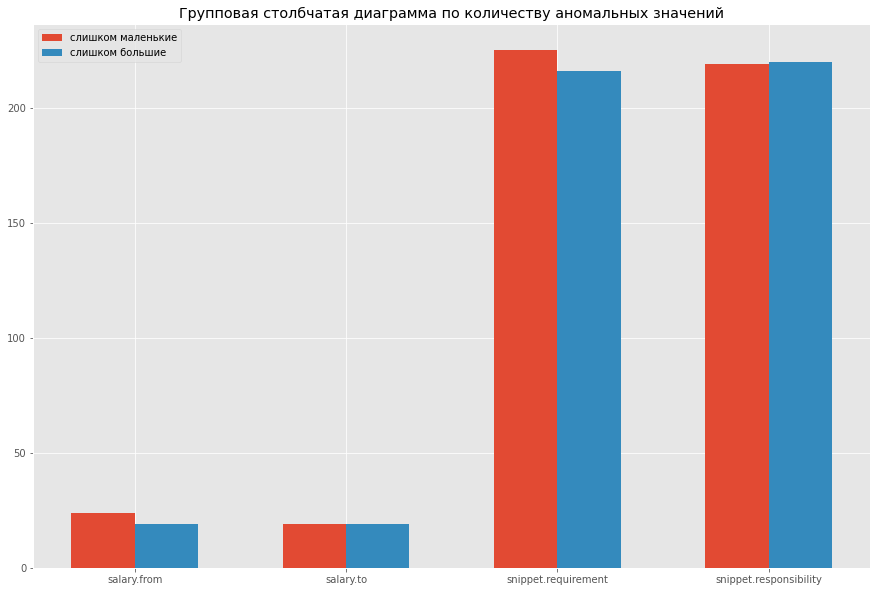

In [ ]:
# Построение диаграммы

plt.style.use('ggplot')

fig , ax = plt.subplots(figsize=(15, 10))

width = 0.3

groups = ['salary.from', 'salary.to', 'snippet.requirement', 'snippet.responsibility']

x = np.arange(len(groups))

rects1 = ax.bar(x - width/2, anomalies_low, width, label='слишком маленькие')
rects2 = ax.bar(x + width/2, anomalies_high, width, label='слишком большие')

ax.set_title('Групповая столбчатая диаграмма по количеству аномальных значений')
ax.set_xticks(x)
ax.set_xticklabels(groups)
ax.set_facecolor('#E6E6E6')
ax.legend()

# Задание 4

In [ ]:
df2 = df.groupby(['area.name'])['id'].count().reset_index(name='counts')
df2

,area.name,counts
0,Екатеринбург,19
1,Москва,708
2,Санкт-Петербург,176


Text(0.5, 1.0, 'Количество вакансий в городах')

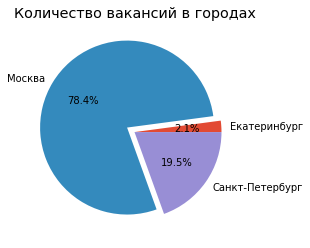

In [ ]:
fig, ax = plt.subplots()
explode = (0, 0.1, 0)  # выделю только вторую долю (т.е. 'Москва')
ax.pie(df2['counts'], labels=df2['area.name'], autopct='%1.1f%%', explode=explode)
ax.set_title('Количество вакансий в городах')



# Задание 5

Text(0.5, 1.0, 'Stacked histogram by city')

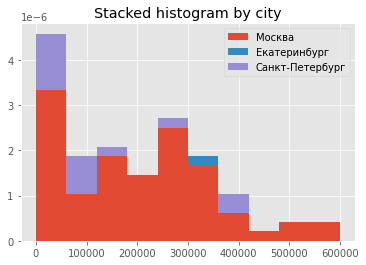

In [ ]:
fig, ax = plt.subplots()
#ax.hist(bins = 10, x=df['salary.to'])
ax.hist([df[df['area.name'] == city]['salary.to'] for city in df['area.name'].unique()], bins=10, histtype='bar', stacked=True, density=True)
ax.legend(df['area.name'].unique())
ax.set_title(label='Stacked histogram by city')

# Задание 6

In [ ]:
df6 = df.groupby(['area.name', 'schedule.name'])['salary.to'].mean().reset_index()
df6

,area.name,schedule.name,salary.to
0,Екатеринбург,Полный день,350000.000000
1,Екатеринбург,Удаленная работа,NaN
2,Москва,Вахтовый метод,NaN
3,Москва,Гибкий график,359433.333333
4,Москва,Полный день,195236.111111
5,Москва,Сменный график,NaN
6,Москва,Удаленная работа,173587.260870
7,Санкт-Петербург,Гибкий график,NaN
8,Санкт-Петербург,Полный день,37071.428571
9,Санкт-Петербург,Сменный график,NaN


<AxesSubplot:xlabel='area.name', ylabel='schedule.name'>

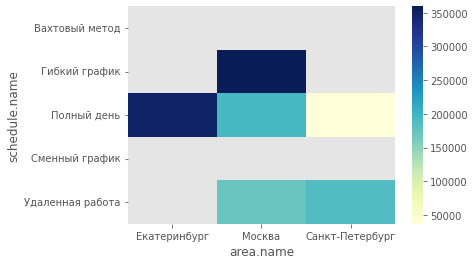

In [ ]:
import seaborn as sns

df1 = df.groupby(['area.name', 'schedule.name'])['salary.to'].mean().reset_index()
sns.heatmap(data=df1.pivot(index='schedule.name', columns='area.name', values='salary.to'), cmap="YlGnBu")

# Задание 7

<AxesSubplot:xlabel='area.name', ylabel='salary.from'>

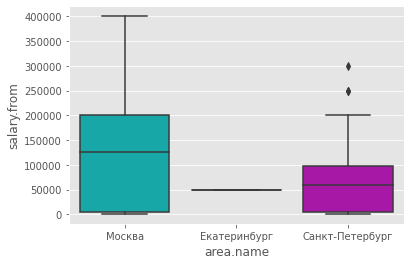

In [ ]:
import seaborn as sns
fig, ax = plt.subplots()
my_pal = {"Москва": "c", "Екатеринбург": "b", "Санкт-Петербург":"m"}
sns.boxplot(x='area.name', y='salary.from', data=df, palette=my_pal)

# Задание 8

In [ ]:
import re

#Не идеальная регулярка, но хоть так. Основная идея в том, чтобы брать английские слова, начинающие с большой буквы

p = re.compile(r'[A-Z]{1}[a-zA-Z]+')

p.findall(df.iloc[5]['snippet.requirement'])

['Python']

In [ ]:
df.iloc[9]['snippet.requirement']

'Опыт работы на позиции <highlighttext>инженера</highlighttext> данных/разработчика БД/ETL от 2 лет. Знание архитектурных принципов построения корпоративных хранилищ данных. '

In [ ]:
# Сделаю словарь для каждой технологии, в котором буду хранить количество встреч в датафрейме

tech_dict = {}

for requirement in df['snippet.requirement']:
  try:
    for skill in p.findall(requirement):
      if skill in tech_dict:
        tech_dict[skill] += 1
      else:
        tech_dict[skill] = 1
  except:
    pass


In [ ]:
tech_dict

{'ML': 35,
 'Python': 175,
 'ClickHouse': 18,
 'SQL': 237,
 'Data': 203,
 'Warehousing': 5,
 'Big': 39,
 'Hadoop': 71,
 'Spark': 83,
 'Hive': 41,
 'Impala': 9,
 'Apache': 44,
 'Airflow': 44,
 'NiFi': 6,
 'ETL': 70,
 'PostgreSQL': 47,
 'Oracle': 36,
 'ELT': 8,
 'Vault': 13,
 'HDFS': 25,
 'Streaming': 5,
 'Kafka': 25,
 'Pyspark': 2,
 'Scienc': 1,
 'Leak': 1,
 'BI': 25,
 'Databricks': 2,
 'HiveQL': 2,
 'Scala': 30,
 'Work': 2,
 'Greenplum': 21,
 'Aerospike': 2,
 'Server': 11,
 'Experience': 34,
 'Cloud': 7,
 'AI': 9,
 'Power': 10,
 'Pandas': 12,
 'Numpy': 3,
 'FastAPI': 2,
 'DWH': 27,
 'BigData': 3,
 'Hue': 1,
 'AWS': 8,
 'Engineer': 25,
 'Lead': 2,
 'Informatica': 3,
 'Talend': 5,
 'Background': 1,
 'DevOps': 6,
 'Software': 4,
 'Familiarity': 1,
 'Solutions': 1,
 'Proficiency': 3,
 'Vertica': 5,
 'Teradata': 12,
 'GreenPlum': 5,
 'Java': 66,
 'Join': 2,
 'Clickhouse': 18,
 'DataVault': 1,
 'Anchor': 4,
 'HPSM': 1,
 'Jira': 7,
 'Confluence': 4,
 'Flink': 6,
 'AirFlow': 15,
 'Go': 7,
 'Li

In [ ]:
sortedDict = sorted(tech_dict.items(), key=lambda x:x[1], reverse=True)
# Возьму первые 20 скиллов
skills = sortedDict[:20]

In [ ]:
skills

[('SQL', 237),
 ('Data', 203),
 ('Python', 175),
 ('Spark', 83),
 ('Hadoop', 71),
 ('ETL', 70),
 ('Java', 66),
 ('Linux', 62),
 ('PostgreSQL', 47),
 ('Apache', 44),
 ('Airflow', 44),
 ('Hive', 41),
 ('Big', 39),
 ('Oracle', 36),
 ('ML', 35),
 ('Experience', 34),
 ('Engineering', 34),
 ('Scala', 30),
 ('Spring', 29),
 ('DWH', 27)]

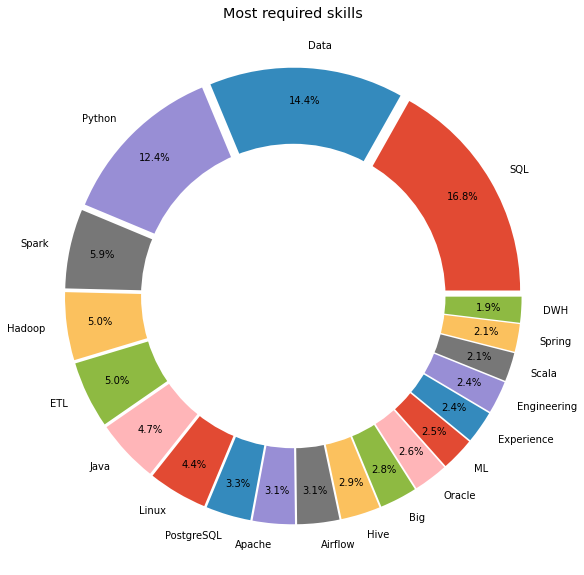

In [ ]:
plt.figure(figsize=(10,10))
# Setting labels for items in Chart
skill = [skill[0] for skill in skills]
  
# Setting size in Chart based on 
# given values
amount = [skill[1] for skill in skills]
  
# explosion
explode = [0.05] * len(skills)
  
# Pie Chart
plt.pie(amount, labels=skill,
        autopct='%1.1f%%', pctdistance=0.85,
        explode=explode)
  
# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
  
# Adding Title of chart
plt.title('Most required skills')
  
# Displaying Chart

plt.show()

# Задание 9

In [ ]:
# Добавлю к датафрейму новый столбец с списком совпадений моего регулярного выражения

df['experience'] = df['snippet.requirement'].astype('str').str.findall(r'(\d+(?:\.\d+)?)')
df.head(5)

,id,name,area.name,salary.from,salary.to,salary.currency,salary.gross,employer.name,snippet.requirement,snippet.responsibility,schedule.name,requirements_len,responsibility_len,experience
0,77448260,Lead Data Engineer,Москва,NaN,500000.0,RUR,False,Wanted,С прошлого года активно развиваем новую област...,...обучения и участвовать в их продукционализа...,Гибкий график,155.0,242.0,[]
1,77015802,Data Engineer,Москва,200000.0,280000.0,RUR,True,HR Prime,Хороший уровень работы с БД. Опыт с Python. Оп...,Поддержание работоспособности платформы. Разра...,Полный день,69.0,101.0,[]
2,75921771,Data engineer,Москва,200000.0,250000.0,RUR,False,РВИ,"Высшее техническое образование, предпочтительн...","Системный анализ, инженерная аналитика. Разраб...",Полный день,169.0,161.0,[]
3,77334669,Аналитик данных / Data Analyst,Москва,160000.0,200000.0,RUR,False,Юрент,Высшее техническое или экономическое образован...,Разработка и валидация новых метрик. Взаимодей...,Удаленная работа,137.0,197.0,[3]
4,77478355,Стажер Data Engineer,Москва,NaN,NaN,NaN,NaN,СБЕР,Желательно: Знание основных понятий и концепци...,"Мы команда, которая занимается созданием витри...",Полный день,210.0,165.0,[]


In [ ]:
#Удалю строки где пустой лист (не нашли указание на требуемый опыт)
temp = df[df['experience'].map(bool)]

In [ ]:
temp['experience'] = temp['experience'].apply(lambda x: np.mean([float(i) for i in x]))

<ipython-input-62-f6c0bb8205dd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['experience'] = temp['experience'].apply(lambda x: np.mean([float(i) for i in x]))


In [ ]:
temp = temp.loc[temp['salary.from'].notna()]

In [ ]:
temp = temp.drop([536, 764, 869, 882])

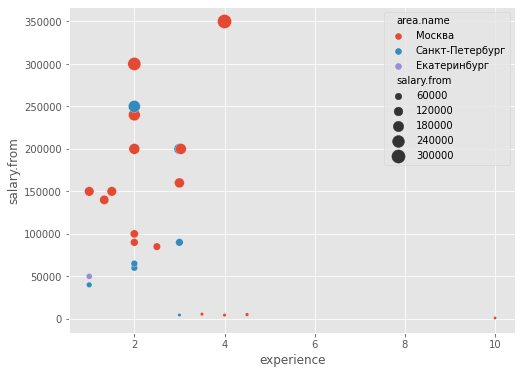

In [ ]:
# построение пузырькового крафика
plt.figure(figsize=(8, 6))
sns.scatterplot(x='experience',
                y='salary.from',
                hue='area.name',
                data=temp,
                size='salary.from',
                sizes=(10, 200))
plt.grid(True)

# Задание 10

<BarContainer object of 6 artists>

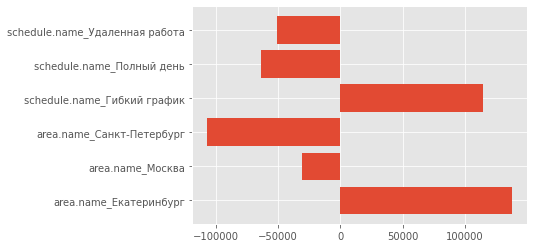

In [ ]:
from sklearn.linear_model import LinearRegression

X=pd.get_dummies(df.loc[~df['salary.to'].isnull(),['area.name','schedule.name']])
Y=df.loc[~df['salary.to'].isnull(),['salary.to']].values

model=LinearRegression()
model.fit(X,Y)
plt.barh(X.columns,model.coef_[0])